In [17]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [25]:
# Load a color image 
img1 = cv2.imread('./data/im/IM_000029.jpg',0)
img2 = cv2.imread('./data/im/IM_000028.jpg',0)
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

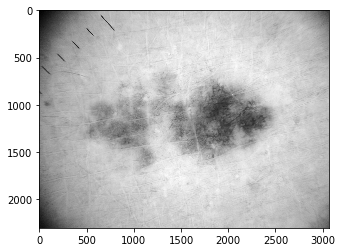

In [23]:
plt.imshow(rgb2gray(img1),cmap = 'gray')

In [15]:

#split and merge
b,g,r = cv2.split(img1) #costly -> use numpy indexing img[:,:,0],..
img = cv2.merge((b,g,r))

#add two images
cv2.add(img1,img2) #saturation when px>255 -> px=255
cv2.addWeighted(img1,0.7,img2,0.3,0)

#change color space
cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# define range of blue color in HSV
lower_blue = np.array([110,50,50])
upper_blue = np.array([130,255,255])

# Threshold the HSV image to get only blue colors
mask = cv2.inRange(hsv, lower_blue, upper_blue)

# Bitwise-AND mask and original image
res = cv2.bitwise_and(frame,frame, mask= mask)

#How to find HSV values
green = np.uint8([[[0,255,0 ]]])
hsv_green = cv2.cvtColor(green,cv2.COLOR_BGR2HSV)

#binary threashold
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)


error: OpenCV(4.0.0) C:\projects\opencv-python\opencv\modules\core\src\arithm.cpp:663: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'cv::arithm_op'


In [11]:
# color spaces
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
#print(flags)